# Cross-Modality Association Network

## Typical Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Full_Data_Nubi_Drive_NEW.csv')

In [3]:
psy=pd.read_csv('Psychometric_Data.csv')

In [4]:
psy=pd.get_dummies(psy, columns=['Gender'])

In [5]:
station=df[df['Trip'].isnull()]
station2 = station[station['BPM'].notna()]
df_12=station2[station2['P_ID']=='P12']
df_13=station2[station2['P_ID']=='P13']
df_15=station2[station2['P_ID']=='P15']
df_17=station2[station2['P_ID']=='P17']
df_18=station2[station2['P_ID']=='P18']
df_19=station2[station2['P_ID']=='P19']
df_20=station2[station2['P_ID']=='P20']
df_22=station2[station2['P_ID']=='P22']
df_23=station2[station2['P_ID']=='P23']
df_24=station2[station2['P_ID']=='P24']
df_27=station2[station2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
new_arr=[]

for elem in arr:
    avg=elem['BPM'].mean()
    new_arr.append(avg)
new_df=pd.DataFrame()
new_df['P_ID']=['P12','P13','P15','P17','P18','P19','P20','P22','P23','P24','P27']
new_df['Averages']=new_arr

In [6]:
df_2=df.drop(['Time', 'latitudes', 'longitudes', 'Time_Second'], axis=1)
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_56088/1899529646.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [7]:
df_12=df_2[df_2['P_ID']=='P12']
df_13=df_2[df_2['P_ID']=='P13']
df_15=df_2[df_2['P_ID']=='P15']
df_17=df_2[df_2['P_ID']=='P17']
df_18=df_2[df_2['P_ID']=='P18']
df_19=df_2[df_2['P_ID']=='P19']
df_20=df_2[df_2['P_ID']=='P20']
df_22=df_2[df_2['P_ID']=='P22']
df_23=df_2[df_2['P_ID']=='P23']
df_24=df_2[df_2['P_ID']=='P24']
df_27=df_2[df_2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
counter=0
for elem in arr:
    elem['BPM']=elem['BPM']-new_arr[counter]
    counter+=1
    
df_new=pd.concat([df_12, df_13, df_15, df_17, df_18, df_19, df_20, df_22, df_23, df_24, df_27])

# df_2=df_new.drop('P_ID', axis=1)
df_2=df_new

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_56088/471915236.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem['BPM']=elem['BPM']-new_arr[counter]


In [8]:
df_2=pd.get_dummies(df_2, columns=['Trip','Day','Src_Weather_Info','Des_Weather_Info'])

In [9]:
df_2=pd.merge(df_2, psy, on='P_ID')

In [10]:
df_2.drop('P_ID', axis=1, inplace=True)

In [11]:
df_2=df_2.dropna(axis=0)

## Gaussian Distributions

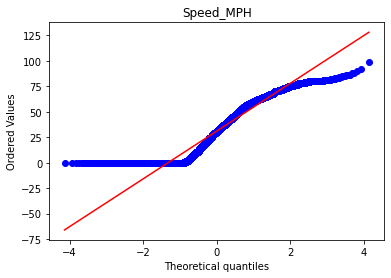

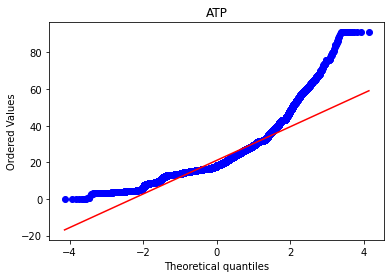

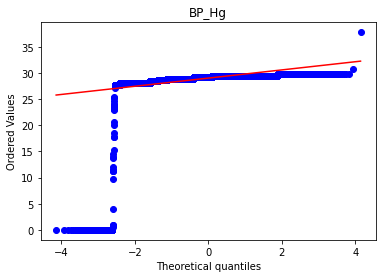

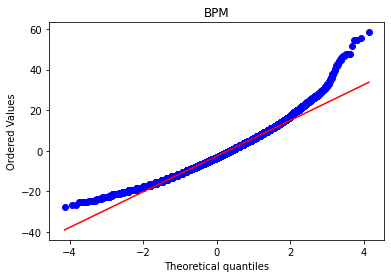

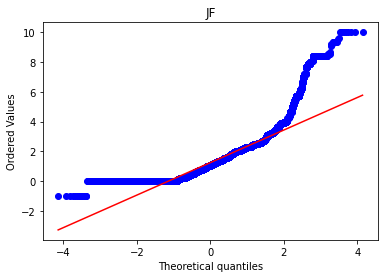

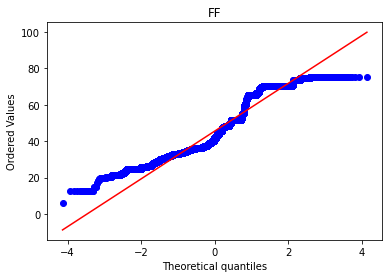

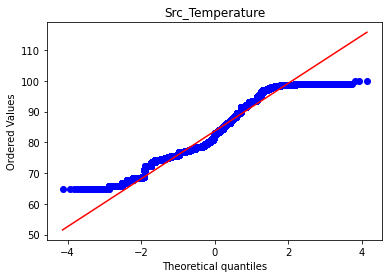

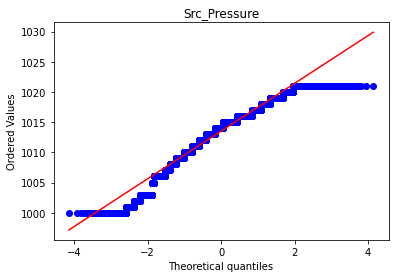

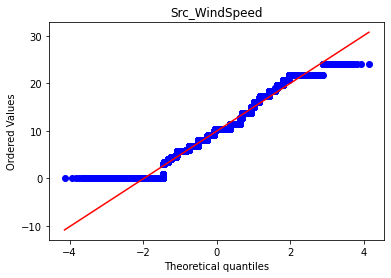

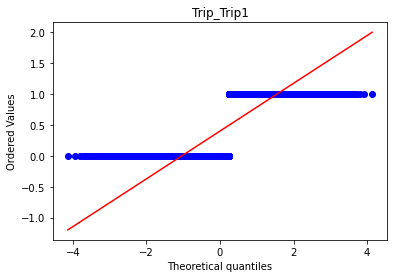

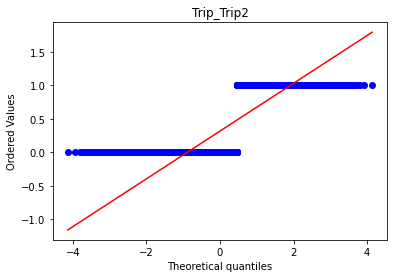

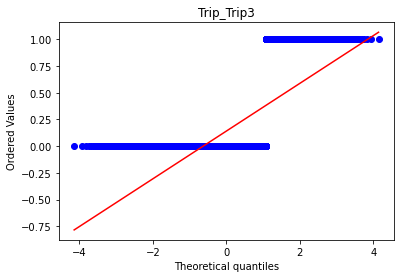

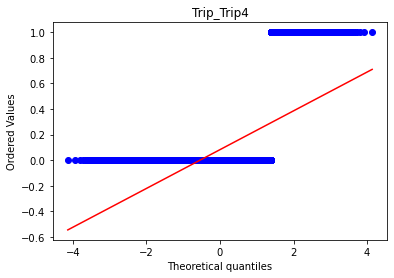

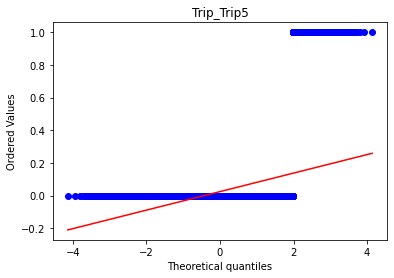

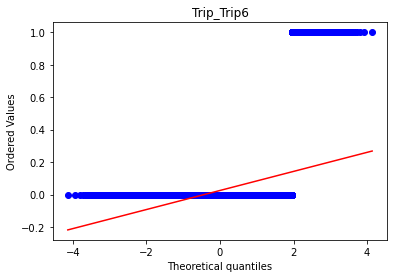

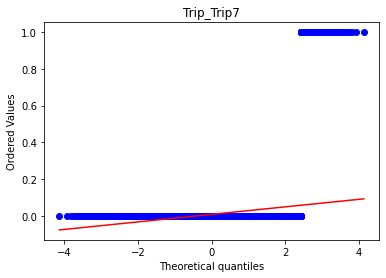

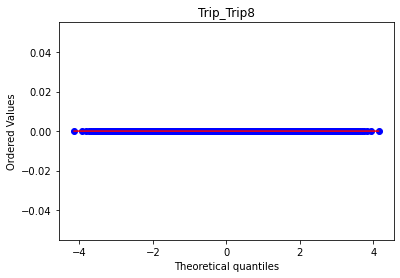

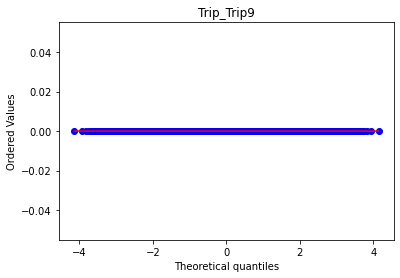

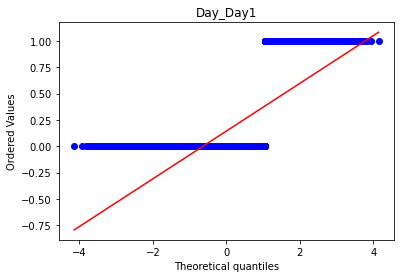

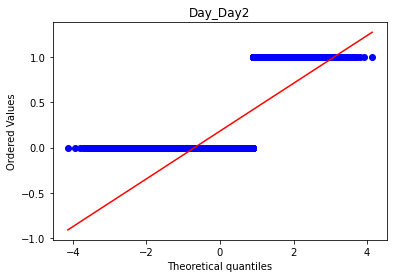

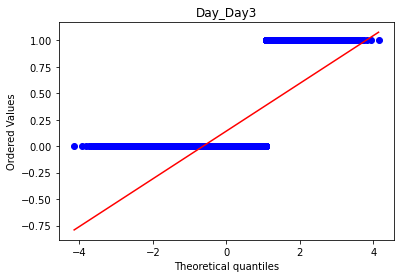

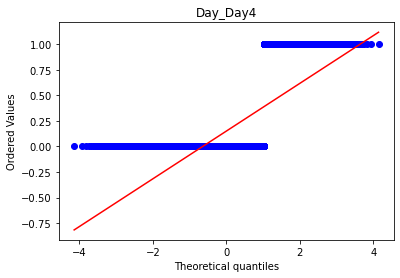

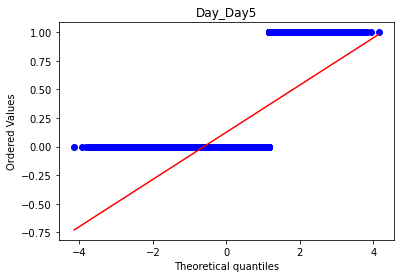

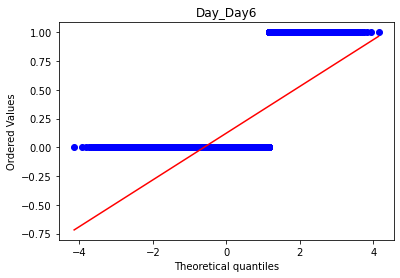

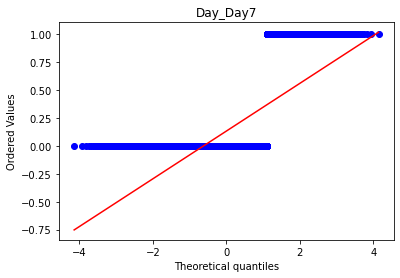

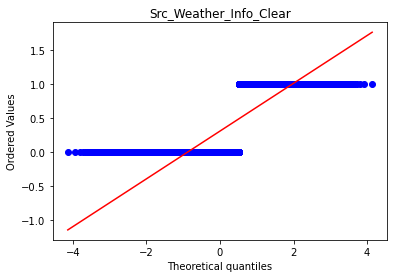

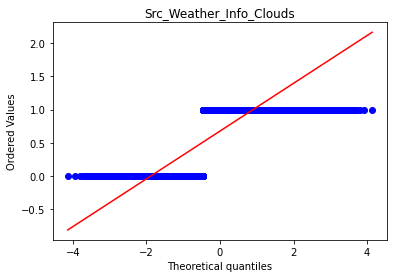

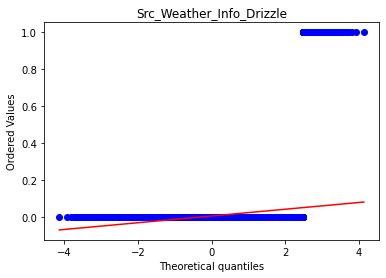

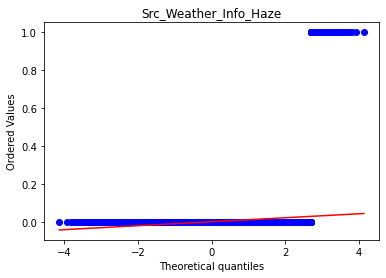

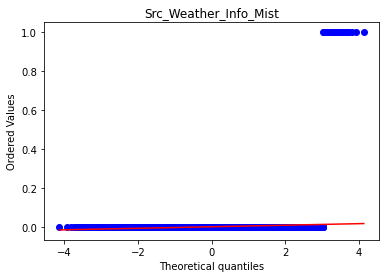

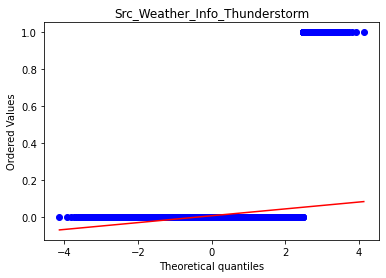

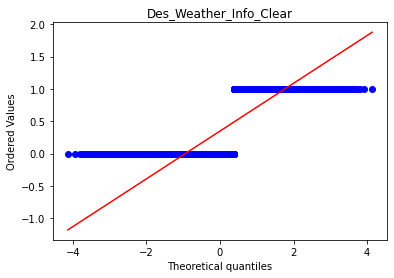

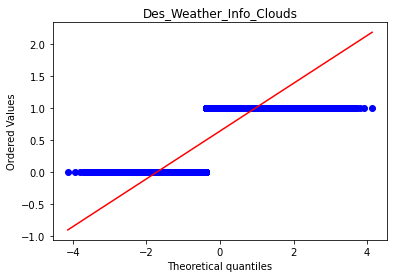

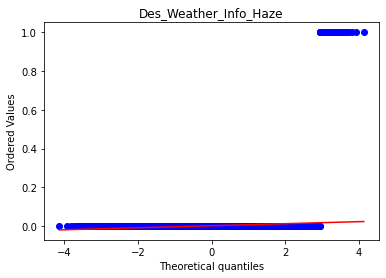

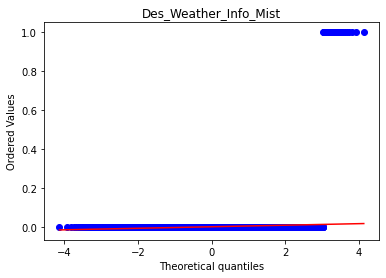

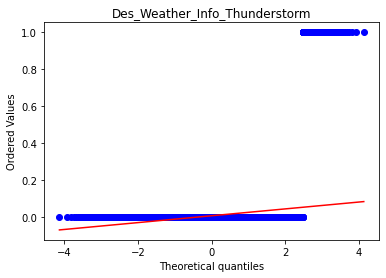

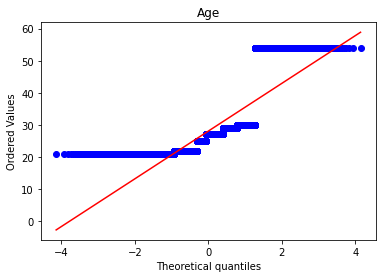

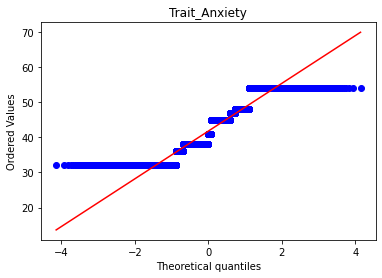

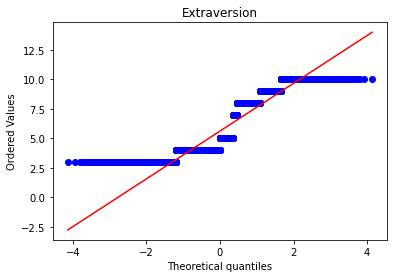

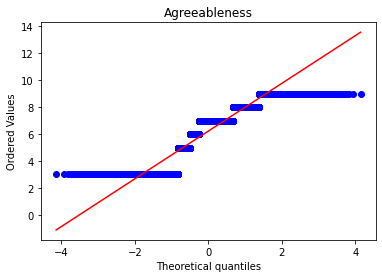

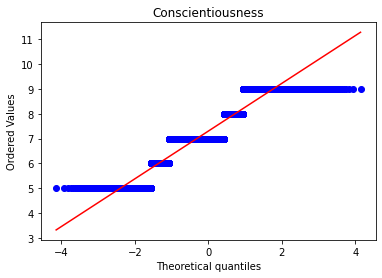

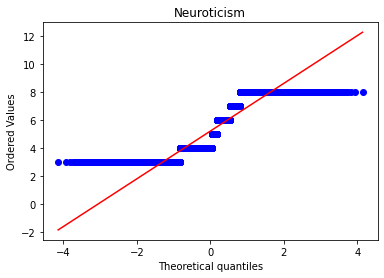

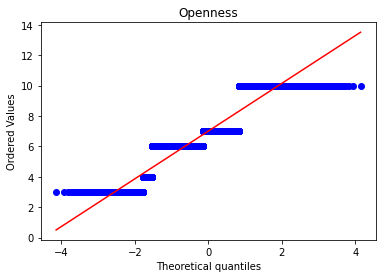

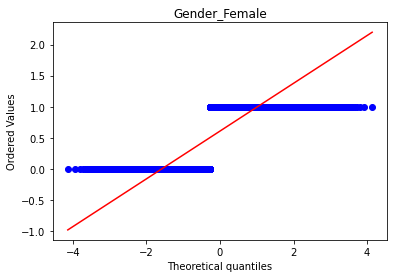

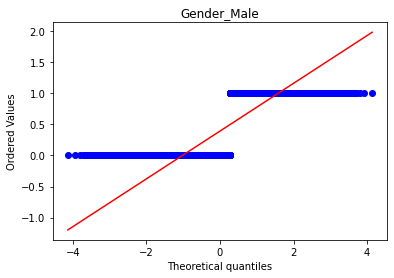

In [12]:
from scipy.stats import probplot
for i in df_2.columns:
    probplot(x=df_2[i],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

In [13]:
df_2.drop(['Trip_Trip1','Trip_Trip2','Trip_Trip3','Trip_Trip4','Trip_Trip5','Trip_Trip6','Trip_Trip7','Trip_Trip8','Trip_Trip9'], axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import FunctionTransformer

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
df_2.columns

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'BPM', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Day_Day1', 'Day_Day2', 'Day_Day3',
       'Day_Day4', 'Day_Day5', 'Day_Day6', 'Day_Day7',
       'Src_Weather_Info_Clear', 'Src_Weather_Info_Clouds',
       'Src_Weather_Info_Drizzle', 'Src_Weather_Info_Haze',
       'Src_Weather_Info_Mist', 'Src_Weather_Info_Thunderstorm',
       'Des_Weather_Info_Clear', 'Des_Weather_Info_Clouds',
       'Des_Weather_Info_Haze', 'Des_Weather_Info_Mist',
       'Des_Weather_Info_Thunderstorm', 'Age', 'Trait_Anxiety', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [17]:
log_transform = FunctionTransformer(lambda x: np.log(x))
ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_2.columns)))]],remainder='passthrough')
log_X = ct.fit_transform(df_2).copy()
log_X = pd.DataFrame(log_X,columns=df_2.columns).copy()

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


## Building the Network

In [18]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [19]:
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_56088/3278247437.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [20]:
calculate_pvalues(df_2)

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Day_Day1,...,Des_Weather_Info_Clear,Des_Weather_Info_Haze,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female
Speed_MPH,0.0,0.0,0.143,0.0,0.0,0.0,0.0,0.0,0.0,0.958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8381,0.0,0.0,0.0
ATP,0.0,0.0,0.0823,0.0,0.0,0.0,0.0,0.0,0.0,0.6889,...,0.0,0.0442,0.0,0.2832,0.0,0.0,0.0,0.0,0.0,0.4219
BP_Hg,0.143,0.0823,0.0,0.0035,0.1587,0.583,0.0,0.0,0.0,0.0,...,0.0,0.0692,0.0,0.0,0.0,0.0747,0.0,0.0,0.0,0.0
BPM,0.0,0.0,0.0035,0.0,0.0,0.0,0.0,0.7417,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.1587,0.0,0.0,0.0,0.918,0.0,0.0,0.0,...,0.0,0.0219,0.0,0.0,0.0,0.0,0.0102,0.0,0.0,0.0
FF,0.0,0.0,0.583,0.0,0.0,0.0,0.0,0.0,0.1014,0.0,...,0.0001,0.0,0.0,0.0,0.0,0.0,0.0773,0.0,0.0,0.0
Src_Temperature,0.0,0.0,0.0,0.0,0.918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Pressure,0.0,0.0,0.0,0.7417,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1829,0.0,0.0,0.0
Src_WindSpeed,0.0,0.0,0.0,0.0,0.0,0.1014,0.0,0.0,0.0,0.0134,...,0.0,0.0,0.0,0.0,0.4551,0.4872,0.0,0.0,0.0002,0.0452
Day_Day1,0.958,0.6889,0.0,0.0,0.0,0.0,0.0,0.0,0.0134,0.0,...,0.0,0.001,0.0072,0.0,0.001,0.0,0.0,0.0,0.4937,0.0


In [21]:
import statsmodels

In [22]:
import networkx as nx

In [23]:
from matplotlib.pyplot import figure

In [24]:
df_cols=pd.DataFrame()

In [25]:
df_2.columns

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'BPM', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Day_Day1', 'Day_Day2', 'Day_Day3',
       'Day_Day4', 'Day_Day5', 'Day_Day6', 'Day_Day7',
       'Src_Weather_Info_Clear', 'Src_Weather_Info_Drizzle',
       'Src_Weather_Info_Haze', 'Src_Weather_Info_Mist',
       'Src_Weather_Info_Thunderstorm', 'Des_Weather_Info_Clear',
       'Des_Weather_Info_Haze', 'Age', 'Trait_Anxiety', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Gender_Female'],
      dtype='object')

In [26]:
df_cols['Weather']=['BP_Hg','Src_Temperature','Src_Pressure','Src_Windspeed','Src_Weather_Info_Clear','Src_Weather_Info_Clouds', 'Src_Weather_Info_Drizzle', 'Src_Weather_Info_Haze', 'Src_Weather_Info_Mist', 'Src_Weather_Info_Thunderstorm', 'Des_Weather_Info_Clear', 'Des_Weather_Info_Clouds', 'Des_Weather_Info_Haze', 'Des_Weather_Info_Mist', 'Des_Weather_Info_Thunderstorm' ]

In [27]:
df_psych=pd.DataFrame({'Psychometrics': ['Age','Trait_Anxiety','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Openness','Gender_Female','Gender_Male']})

In [28]:
df_cols = pd.concat([df_cols, df_psych], axis=1) 

In [29]:
df_cols

,Weather,Psychometrics
0,BP_Hg,Age
1,Src_Temperature,Trait_Anxiety
2,Src_Pressure,Extraversion
3,Src_Windspeed,Agreeableness
4,Src_Weather_Info_Clear,Conscientiousness
5,Src_Weather_Info_Clouds,Neuroticism
6,Src_Weather_Info_Drizzle,Openness
7,Src_Weather_Info_Haze,Gender_Female
8,Src_Weather_Info_Mist,Gender_Male
9,Src_Weather_Info_Thunderstorm,NaN


In [30]:
G=nx.Graph()

In [33]:
calculate_pvalues(df_2)

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Day_Day1,...,Des_Weather_Info_Clear,Des_Weather_Info_Haze,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female
Speed_MPH,0.0,0.0,0.143,0.0,0.0,0.0,0.0,0.0,0.0,0.958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8381,0.0,0.0,0.0
ATP,0.0,0.0,0.0823,0.0,0.0,0.0,0.0,0.0,0.0,0.6889,...,0.0,0.0442,0.0,0.2832,0.0,0.0,0.0,0.0,0.0,0.4219
BP_Hg,0.143,0.0823,0.0,0.0035,0.1587,0.583,0.0,0.0,0.0,0.0,...,0.0,0.0692,0.0,0.0,0.0,0.0747,0.0,0.0,0.0,0.0
BPM,0.0,0.0,0.0035,0.0,0.0,0.0,0.0,0.7417,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.1587,0.0,0.0,0.0,0.918,0.0,0.0,0.0,...,0.0,0.0219,0.0,0.0,0.0,0.0,0.0102,0.0,0.0,0.0
FF,0.0,0.0,0.583,0.0,0.0,0.0,0.0,0.0,0.1014,0.0,...,0.0001,0.0,0.0,0.0,0.0,0.0,0.0773,0.0,0.0,0.0
Src_Temperature,0.0,0.0,0.0,0.0,0.918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Pressure,0.0,0.0,0.0,0.7417,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1829,0.0,0.0,0.0
Src_WindSpeed,0.0,0.0,0.0,0.0,0.0,0.1014,0.0,0.0,0.0,0.0134,...,0.0,0.0,0.0,0.0,0.4551,0.4872,0.0,0.0,0.0002,0.0452
Day_Day1,0.958,0.6889,0.0,0.0,0.0,0.0,0.0,0.0,0.0134,0.0,...,0.0,0.001,0.0072,0.0,0.001,0.0,0.0,0.0,0.4937,0.0


In [34]:
pvals=calculate_pvalues(df_2)

In [37]:
pvals.rename(columns = {'Src_Weather_Info_Thunderstorm':'Src_Thunderstorm'}, inplace = True)

In [38]:
pvals.rename(columns = {'Day_Day1':'Day1', 'Day_Day2':'Day2', 'Day_Day3':'Day3', 'Day_Day4':'Day4',}, inplace = True)

In [39]:
pvals.rename(columns = {'Day_Day5':'Day5', 'Day_Day6':'Day6', 'Day_Day7':'Day7'}, inplace = True)

In [63]:
pvals.rename(columns = {'Src_Weather_Info_Mist':'Src_Mist', 'Src_Weather_Info_Haze':'Src_Haze'}, inplace = True)

In [98]:
pvals.rename(columns = {'JF':'Jam_Factor'}, inplace = True)

In [112]:
pvals.rename(columns = {'FF':'Free_Flow'}, inplace = True)

In [113]:
columns=pvals.columns

In [114]:
columns

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'BPM', 'Jam_Factor', 'Free_Flow',
       'Src_Temperature', 'Src_Pressure', 'Src_WindSpeed', 'Day1', 'Day2',
       'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Src_Weather_Info_Clear',
       'Src_Weather_Info_Drizzle', 'Src_Haze', 'Src_Mist', 'Src_Thunderstorm',
       'Des_Weather_Info_Clear', 'Des_Weather_Info_Haze', 'Age',
       'Trait_Anxiety', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'Gender_Female'],
      dtype='object')

In [115]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1
            

In [127]:
df_map=pd.DataFrame()

In [128]:
df_map['Source']=nonzeros['Indexes']

In [129]:
df_map['Destination']=nonzeros['Columns']

In [147]:
df_map['Weights']=-3/4*np.log(nonzeros['Elements'])

In [148]:
df_map

,Source,Destination,Weights
0,Speed_MPH,BP_Hg,1.458683
1,Speed_MPH,Day1,0.032181
2,Speed_MPH,Src_Mist,3.185622
3,Speed_MPH,Conscientiousness,0.132463
4,ATP,BP_Hg,1.873038
...,...,...,...
167,Openness,Src_WindSpeed,6.387895
168,Openness,Day1,0.529370
169,Openness,Src_Thunderstorm,0.014693
170,Gender_Female,ATP,0.647240


In [149]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

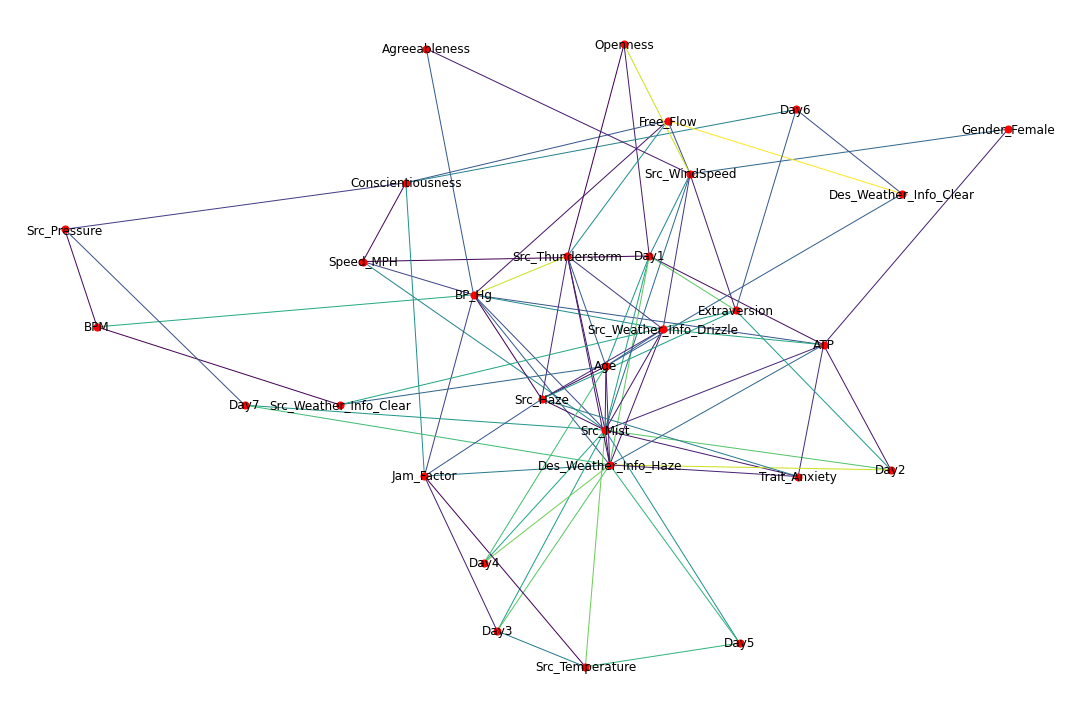

In [150]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, edge_color=widths, edge_cmap=plt.cm.viridis)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

In [151]:
import networkx.algorithms.community as nx_com

In [152]:
from community import community_louvain

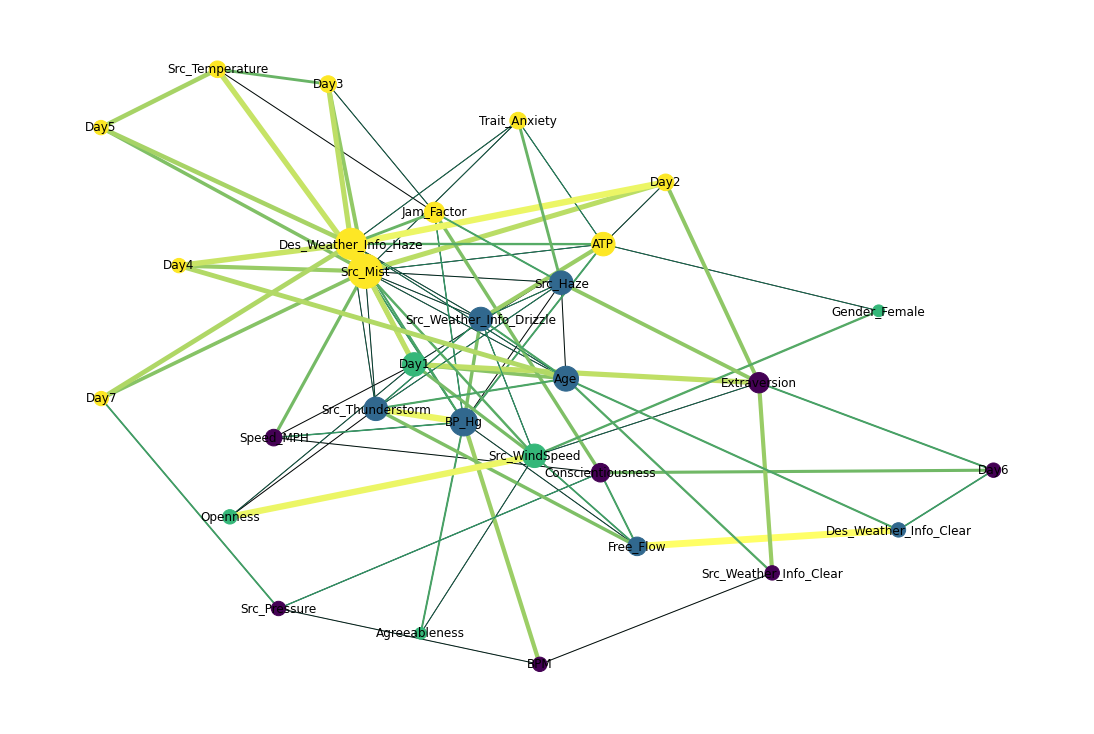

In [153]:
deg_centrality = nx.degree_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)

plt.figure(figsize=(15,10))

# modularity
label = community_louvain.best_partition(G)
mod = community_louvain.modularity(label, G)
values = [label.get(node) for node in G.nodes()]


# plot
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=values, node_size=centrality*2e3)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.summer)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", )
plt.show()